<a href="https://colab.research.google.com/github/boatnoah/Project-MNIST-tf/blob/main/Project_MNISTtf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import logging

logging.getLogger('tensorflow').disabled = True

2. Load Dataset

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(-1, 28*28) / 255.0
test_images = test_images.reshape(-1, 28*28) / 255.0

train_labels = np.asarray(train_labels, dtype=np.int32)
test_labels = np.asarray(test_labels, dtype=np.int32)

11490434/11490434 [==============================] - 0s 0us/step


3. Display dataset

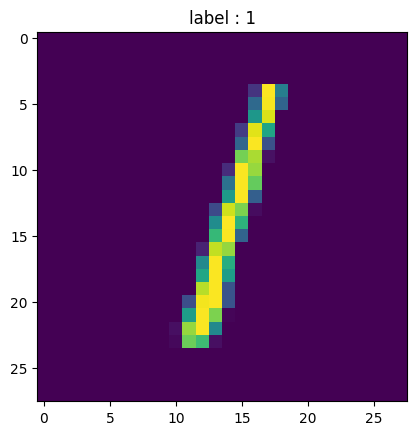

In [ ]:
def display(i):
    img = test_images[i]
    plt.title('label : {}'.format(test_labels[i]))
    plt.imshow(img.reshape((28, 28)))

# image in TensorFlow is 28 by 28 px
display(2)

4. Create and fit model

In [ ]:
feature_columns = train_images.shape[1]

# Create a simple Keras sequential model
model = keras.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(feature_columns,)))

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4688 - accuracy: 0.8777
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3035 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2828 - accuracy: 0.9211
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9246
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9262
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2554 - accuracy: 0.9291
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2531 - accuracy: 0.9300
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.25

3. Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2629 - accuracy: 0.9267
Test accuracy: 0.9266999959945679
Test loss: 0.2628570795059204


4. Predict

1/1 [==============================] - 0s 23ms/step
Predictions: 9


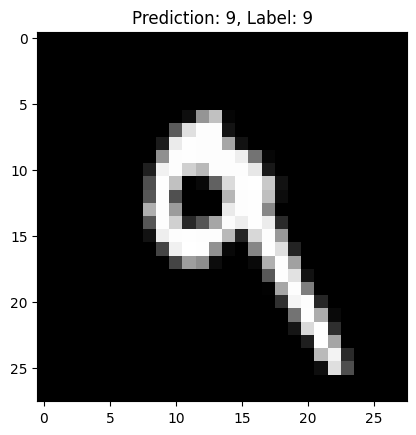

In [ ]:
def predict_image(model, img):
  pred = model.predict(img[None, :])
  return np.argmax(pred[0])

img = test_images[5]
pred = predict_image(model, img)

print(f"Predictions: {pred}")

plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {pred}, Label: {test_labels[7]}")
plt.show()